# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

load_dotenv()
%config IPCompleter.greedy=True

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [6]:
#Function to create dataframes from the news articles

def create_df(news):
    articles = []
    for article in news:
        #print(article)
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)


In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
#print(bitcoin_news_en)
bitcoin_news_df = create_df(bitcoin_news_en["articles"])



In [8]:
bitcoin_news_df.head()

,title,description,text,date
0,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03
1,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",2022-06-09
2,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,2022-06-08
3,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",2022-06-05
4,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,2022-06-02


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_news_df = create_df(ethereum_news_en["articles"])

In [10]:
ethereum_news_df.head(5)

,title,description,text,date
0,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,2022-05-23
1,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...","The price of Ethereum has dropped below $1,250...",2022-06-18
2,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,2022-05-23
3,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,2022-06-07
4,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",2022-06-09


In [11]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [12]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
bitcoin_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        bitcoin_title_sent["title_compound"].append(title_sentiment["compound"])
        bitcoin_title_sent["title_pos"].append(title_sentiment["pos"])
        bitcoin_title_sent["title_neu"].append(title_sentiment["neu"])
        bitcoin_title_sent["title_neg"].append(title_sentiment["neg"])
        bitcoin_title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        bitcoin_text_sent["text_compound"].append(text_sentiment["compound"])
        bitcoin_text_sent["text_pos"].append(text_sentiment["pos"])
        bitcoin_text_sent["text_neu"].append(text_sentiment["neu"])
        bitcoin_text_sent["text_neg"].append(text_sentiment["neg"])
        bitcoin_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
bitcoin_title_sentiment_df = pd.DataFrame(bitcoin_title_sent)
bitcoin_text_sentiment_df = pd.DataFrame(bitcoin_text_sent)
bitcoin_news_df = bitcoin_news_df.join(bitcoin_title_sentiment_df).join(bitcoin_text_sentiment_df)

bitcoin_news_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03,0.0000,0.000,1.000,0.0,0,-0.5574,0.000,0.902,0.098,-1
1,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",2022-06-09,0.0000,0.000,1.000,0.0,0,0.4404,0.077,0.923,0.000,1
2,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,2022-06-08,0.0000,0.000,1.000,0.0,0,0.5267,0.124,0.876,0.000,1
3,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",2022-06-05,0.0000,0.000,1.000,0.0,0,0.5106,0.164,0.836,0.000,1
4,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,2022-06-02,0.3182,0.365,0.635,0.0,1,-0.1027,0.000,0.960,0.040,-1


In [13]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
ethereum_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        ethereum_title_sent["title_compound"].append(title_sentiment["compound"])
        ethereum_title_sent["title_pos"].append(title_sentiment["pos"])
        ethereum_title_sent["title_neu"].append(title_sentiment["neu"])
        ethereum_title_sent["title_neg"].append(title_sentiment["neg"])
        ethereum_title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        ethereum_text_sent["text_compound"].append(text_sentiment["compound"])
        ethereum_text_sent["text_pos"].append(text_sentiment["pos"])
        ethereum_text_sent["text_neu"].append(text_sentiment["neu"])
        ethereum_text_sent["text_neg"].append(text_sentiment["neg"])
        ethereum_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
ethereum_title_sentiment_df = pd.DataFrame(ethereum_title_sent)
ethereum_text_sentiment_df = pd.DataFrame(ethereum_text_sent)
ethereum_news_df = ethereum_news_df.join(ethereum_title_sentiment_df).join(ethereum_text_sentiment_df)



In [14]:
bitcoin_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.045391,0.060580,0.849770,0.089640,-0.060000,-0.001393,0.063760,0.871750,0.064560,0.030000
std,0.293375,0.097781,0.162474,0.133477,0.736083,0.412721,0.062161,0.080679,0.067215,0.915136
min,-0.908100,0.000000,0.361000,0.000000,-1.000000,-0.948500,0.000000,0.628000,0.000000,-1.000000
25%,-0.255800,0.000000,0.748750,0.000000,-1.000000,-0.312300,0.000000,0.829000,0.000000,-1.000000
50%,0.000000,0.000000,0.887000,0.000000,0.000000,0.000000,0.067000,0.868000,0.064500,0.000000
75%,0.006450,0.114250,1.000000,0.159250,0.000000,0.318200,0.110500,0.923500,0.103250,1.000000
max,0.636900,0.365000,1.000000,0.639000,1.000000,0.709600,0.220000,1.000000,0.372000,1.000000


In [15]:
ethereum_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000
mean,-0.036236,0.062460,0.860210,0.077350,-0.050000,0.053590,0.07365,0.86900,0.057320,0.030000
std,0.288424,0.107269,0.173297,0.137513,0.672324,0.450821,0.07628,0.08969,0.066344,0.926108
min,-0.908100,0.000000,0.353000,0.000000,-1.000000,-0.948500,0.00000,0.60400,0.000000,-1.000000
25%,-0.019300,0.000000,0.755250,0.000000,-0.250000,-0.273200,0.00000,0.81400,0.000000,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.06100,0.87500,0.049000,0.000000
75%,0.000000,0.134750,1.000000,0.160000,0.000000,0.406800,0.11250,0.93425,0.086000,1.000000
max,0.757900,0.380000,1.000000,0.639000,1.000000,0.916900,0.34900,1.00000,0.372000,1.000000


In [16]:
# sum of mean title positive score and text positive score

bitcoin_mean_pos_score = bitcoin_news_df.describe()["title_pos"][1] + bitcoin_news_df.describe()["text_pos"][1] 

print(f"Bitcoin's mean positive score - {bitcoin_mean_pos_score}")

ethereum_mean_pos_score = ethereum_news_df.describe()["title_pos"][1] + ethereum_news_df.describe()["text_pos"][1] 

print(f"Ethereum's mean positive score - {ethereum_mean_pos_score}")


        


Bitcoin's mean positive score - 0.12434000000000002
Ethereum's mean positive score - 0.13611


## Printing highest mean positive score 

In [47]:
if bitcoin_mean_pos_score > ethereum_mean_pos_score:
    print(f"Bitcoin has a higher Mean Positive score of - {bitcoin_mean_pos_score}")
elif bitcoin_mean_pos_score < ethereum_mean_pos_score:
    print(f"Ethereum has a higher Mean Positive score of - {ethereum_mean_pos_score}")
else:
    print(f"Both Bitcoin and Ethereum have the same mean positive score of - {bitcoin_mean_pos_score}")

Ethereum has a higher Mean Positive score of - 0.13611


In [17]:
# sum of compound scores

bitcoin_compound_score = bitcoin_news_df.describe()["title_compound"][7] + bitcoin_news_df.describe()["text_compound"][7]
print(f"Bitcoin's max compound score - {bitcoin_compound_score}")

ethereum_compound_score = ethereum_news_df.describe()["title_compound"][7] + ethereum_news_df.describe()["text_compound"][7]
print(f"Ethereum's max compound score - {ethereum_compound_score}")

Bitcoin's max compound score - 1.3465
Ethereum's max compound score - 1.6748


## Printing Highest Compund Score

In [49]:
if bitcoin_compound_score > ethereum_compound_score:
    print(f"Bitcoin has a higher Mean Positive score of - {bitcoin_compound_score}")
elif bitcoin_compound_score < ethereum_compound_score:
    print(f"Ethereum has a higher Mean Positive score of - {ethereum_compound_score}")
else:
    print(f"Both Bitcoin and Ethereum have the same mean positive score of - {bitcoin_compound_score}")

Ethereum has a higher Mean Positive score of - 1.6748


In [18]:
# sum of positive scores

bitcoin_positive_score = bitcoin_news_df.describe()["title_pos"][7] + bitcoin_news_df.describe()["text_pos"][7]
print(f"Bitcoin's max positive score - {bitcoin_positive_score}")

ethereum_positive_score = ethereum_news_df.describe()["title_pos"][7] + ethereum_news_df.describe()["text_pos"][7]
print(f"Ethereum's max positive score - {ethereum_positive_score}")

Bitcoin's max positive score - 0.585
Ethereum's max positive score - 0.729


## Printing Highest positive score

In [51]:
if bitcoin_positive_score > ethereum_positive_score:
    print(f"Bitcoin has a higher Mean Positive score of - {bitcoin_positive_score}")
elif bitcoin_positive_score < ethereum_positive_score:
    print(f"Ethereum has a higher Mean Positive score of - {ethereum_positive_score}")
else:
    print(f"Both Bitcoin and Ethereum have the same mean positive score of - {bitcoin_positive_score}")

Ethereum has a higher Mean Positive score of - 0.729


### Questions:

Q: Which coin had the highest mean positive score?

A: Please refer to cell 47 above

Q: Which coin had the highest compound score?

A: Please refer to cell 49 above

Q. Which coin had the highest positive score?

A: lease refer to cell 50 above

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    #print(text)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase
    
    output = [word.lower() for word in lem]
    # Remove the stop words
    
    tokens = [token for token in output if token not in sw]
    
    return tokens

In [22]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

text_tokens = {"text_tokens": []}

for index, row in bitcoin_news_df.iterrows():
    row_text_tokens = tokenizer(row["text"])
    text_tokens["text_tokens"].append(row_text_tokens)
    


text_tokens_df = pd.DataFrame(text_tokens)

bitcoin_news_df = bitcoin_news_df.join(text_tokens_df)

bitcoin_news_df

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,text_tokens
0,New York passes a bill to limit bitcoin mining,New York lawmakers have passed a bill\r\n that...,New York lawmakers have passed a bill\r\n that...,2022-06-03,0.0000,0.000,1.000,0.000,0,-0.5574,0.000,0.902,0.098,-1,"[new, york, lawmaker, passed, bill, would, tem..."
1,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",2022-06-09,0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1,"[rapper, entrepreneur, shawn, carter, better, ..."
2,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,2022-06-08,0.0000,0.000,1.000,0.000,0,0.5267,0.124,0.876,0.000,1,"[new, study, bitcoin, call, question, whether,..."
3,Why the Central African Republic adopted Bitcoin,Some 90% of people in the Central African Repu...,"Image caption, President Faustin-Archange Toua...",2022-06-05,0.0000,0.000,1.000,0.000,0,0.5106,0.164,0.836,0.000,1,"[image, caption, president, faustinarchange, t..."
4,Chipotle now accepts cryptocurrency payments,You can now reportedly pay for your burritos a...,You can now reportedly pay for your burritos a...,2022-06-02,0.3182,0.365,0.635,0.000,1,-0.1027,0.000,0.960,0.040,-1,"[reportedly, pay, burrito, taco, bitcoin, digi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cryptoverse: The funds making moolah from mess...,"The crypto market's a hot mess, leaving many i...",June 14 (Reuters) - The crypto market's a hot ...,2022-06-14,-0.3612,0.000,0.762,0.238,-1,-0.6486,0.000,0.845,0.155,-1,"[june, reuters, crypto, market, hot, mess, lea..."
96,Benfica to join crypto craze with Socios - Reu...,"Portugal's biggest soccer club, Benfica, will ...","LISBON, June 7 (Reuters) - Portugal's biggest ...",2022-06-07,0.1531,0.224,0.612,0.163,1,0.7096,0.220,0.733,0.047,1,"[lisbon, june, reuters, portugals, biggest, so..."
97,Binance U.S. exchange sued by crypto investor ...,Binance U.S. and its CEO were sued on Monday b...,"NEW YORK, June 13 (Reuters) - Binance U.S. and...",2022-06-13,-0.4939,0.000,0.758,0.242,-1,0.6597,0.141,0.859,0.000,1,"[new, york, june, reuters, binance, us, ceo, s..."
98,Blockchain tech firm StarkWare raises $100 mln...,Israeli blockchain technology firm StarkWare I...,"JERUSALEM, May 25 (Reuters) - Israeli blockcha...",2022-05-25,0.4404,0.209,0.791,0.000,1,0.4404,0.086,0.914,0.000,1,"[jerusalem, may, reuters, israeli, blockchain,..."


In [23]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_text_tokens = {"text_tokens": []}

for index, row in ethereum_news_df.iterrows():
    row_text_tokens = tokenizer(row["text"])
    eth_text_tokens["text_tokens"].append(row_text_tokens)
    


eth_text_tokens_df = pd.DataFrame(eth_text_tokens)

ethereum_news_df = ethereum_news_df.join(eth_text_tokens_df)

ethereum_news_df.head(5)

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,text_tokens
0,GameStop Dunks Its Head Into the Crypto Kiddie...,GameStop has officially thrown itself headlong...,GameStop has officially thrown itself headlong...,2022-05-23,0.0000,0.000,1.000,0.000,0,-0.1027,0.000,0.960,0.04,-1,"[gamestop, ha, officially, thrown, headlong, w..."
1,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...","The price of Ethereum has dropped below $1,250...",2022-06-18,0.7579,0.380,0.524,0.096,1,0.2732,0.063,0.937,0.00,1,"[price, ethereum, ha, dropped, energy, price, ..."
2,GameStop Launching Digital Wallet for Cryptocu...,The self-custodial Ethereum wallet will have i...,GameStop is going all-in on crypto. The video ...,2022-05-23,0.0000,0.000,1.000,0.000,0,0.1280,0.046,0.954,0.00,1,"[gamestop, going, allin, crypto, video, game, ..."
3,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,2022-06-07,0.0000,0.000,1.000,0.000,0,0.3182,0.059,0.941,0.00,1,"[ability, conduct, external, transfer, paypals..."
4,MoonDAO Will Pick 2 of the Next Blue Origin As...,A community of cryptocurrency enthusiasts crow...,"A decentralized autonomous organization, or DA...",2022-06-09,0.4019,0.162,0.838,0.000,1,0.5859,0.134,0.866,0.00,1,"[decentralized, autonomous, organization, dao,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    #print(f"Corpus - {corpus}")
    big_string = ' '.join(corpus)
    #print(big_string)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])




In [26]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [27]:
bitcoin_text = []

for index, row in bitcoin_news_df.iterrows():
    bitcoin_text = bitcoin_text + row["text_tokens"]
    
word_counter(bitcoin_text)

,word,count
0,"(june, reuters)",27
1,"(char, june)",15
2,"(may, reuters)",12
3,"(reuters, bitcoin)",8
4,"(crypto, lender)",7
5,"(new, york)",5
6,"(celsius, network)",5
7,"(world, biggest)",5
8,"(biggest, bestknown)",5
9,"(char, london)",5


In [28]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

eth_text = []

for index, row in ethereum_news_df.iterrows():
    eth_text = eth_text + row["text_tokens"]
    
word_counter(eth_text)

,word,count
0,"(char, june)",9
1,"(june, reuters)",9
2,"(cryptocurrency, market)",6
3,"(char, new)",5
4,"(reuters, bitcoin)",5
5,"(world, biggest)",5
6,"(biggest, bestknown)",5
7,"(crypto, lender)",5
8,"(crypto, winter)",4
9,"(may, reuters)",4


In [29]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_count = token_count(bitcoin_text, 10)

bitcoin_count


[('char', 98),
 ('bitcoin', 49),
 ('reuters', 40),
 ('crypto', 34),
 ('june', 31),
 ('cryptocurrency', 27),
 ('ha', 26),
 ('market', 20),
 ('new', 16),
 ('investor', 15)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

eth_count = token_count(eth_text, 10)

eth_count

[('char', 96),
 ('crypto', 38),
 ('ha', 27),
 ('cryptocurrency', 26),
 ('market', 25),
 ('bitcoin', 17),
 ('price', 15),
 ('ethereum', 14),
 ('reuters', 13),
 ('new', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

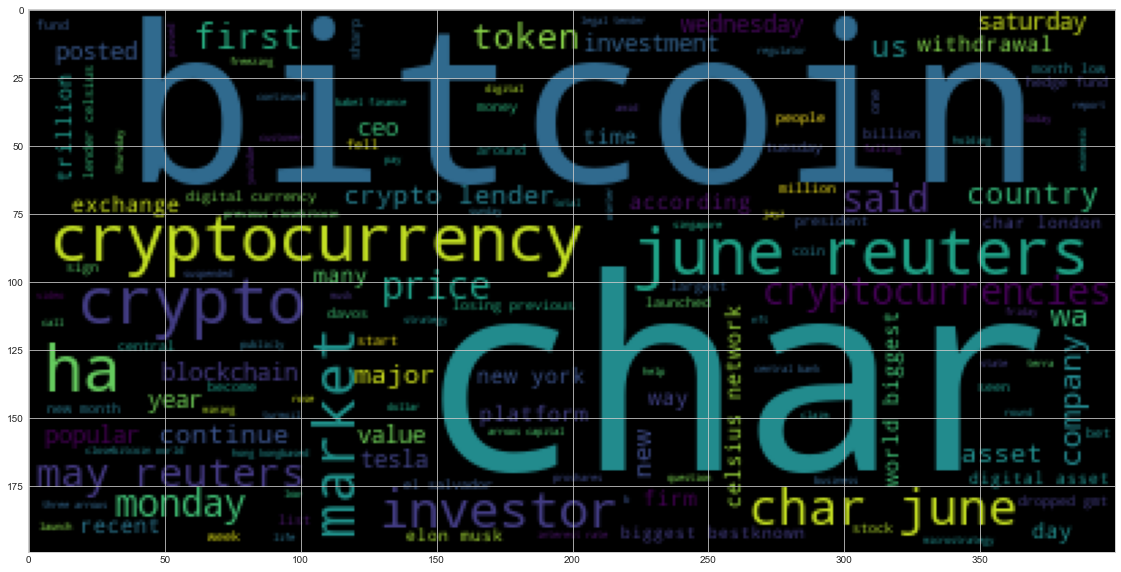

In [82]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!


bitcoin_string = ' '.join(bitcoin_text)

bitcoin_cloud = WordCloud().generate(bitcoin_string)

plt.imshow(bitcoin_cloud)

plt.savefig("../Images/btc-word-cloud.png")

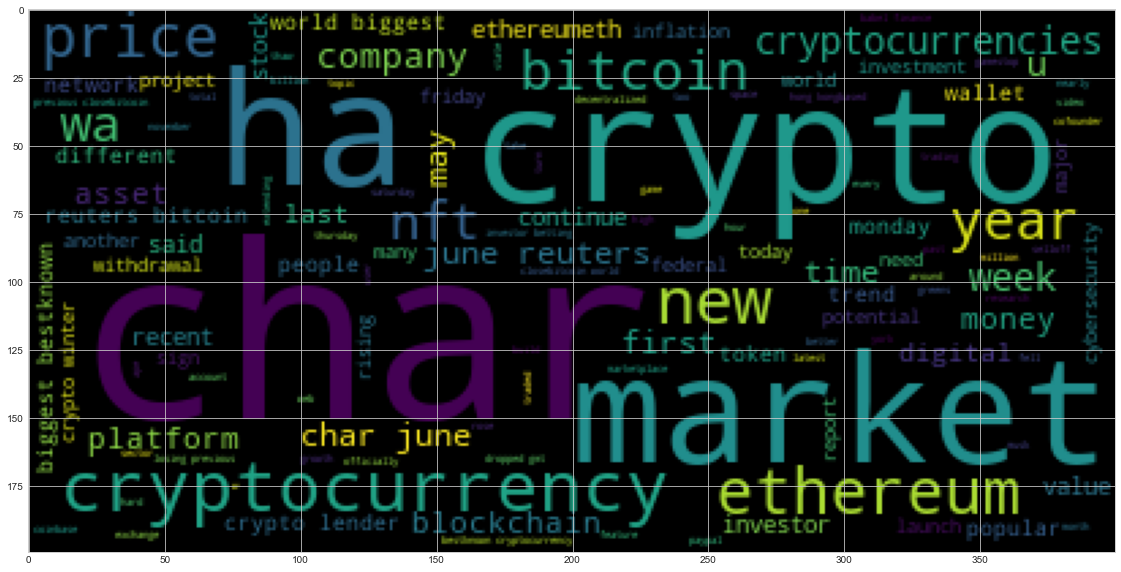

In [83]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!


eth_string = ' '.join(eth_text)

eth_cloud = WordCloud().generate(eth_string)

plt.imshow(eth_cloud)

plt.savefig("../Images/eth-word-cloud.png")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [70]:
import spacy
from spacy import displacy

In [71]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [72]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [74]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

bitcoin_string

'new york lawmaker passed bill would temporarily ban new bitcoin mining operation early friday state senator voted pas legislation bound desk char rapper entrepreneur shawn carter better known jayz bringing bitcoin place grew thursday jayz former twitter ceo jack dorsey announced launch bitcoin char new study bitcoin call question whether digital currency truly decentralized anonymous biggest devotee would believe researchers baylor rice char image caption president faustinarchange touadra want rethink country economic philosophythe central african republics decision adopt bitcoin legal tender came surprise char reportedly pay burrito taco bitcoin digital currency case dont mind spending coin directly instead going exchange first flexa h char joe tidycyber reporter cryptocurrencies continued tumble week billion wiped value token like bitcoin crash affecting investor worldwide including go char cnnel salvador ha embraced bitcoin like country government purchasing hundred coin last year 

In [75]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

bitcoin_ner = nlp(bitcoin_string)

# Add a title to the document
bitcoin_ner.user_data['title'] = 'Bitcoin Named Entity Recognition'



In [76]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(bitcoin_ner, style="ent")

In [77]:
# List all Entities
# YOUR CODE HERE!

bitcoin_entities = bitcoin_ner.ents

bitcoin_entities


(new york,
 early friday,
 shawn carter,
 jayz,
 thursday,
 jayz,
 jack dorsey,
 central african,
 first,
 joe tidycyber,
 cryptocurrencies,
 hundred,
 paris,
 one,
 grayson blackmon,
 michael chobanian,
 blockchain association,
 june,
 reuters,
 gmt monday,
 year,
 june,
 reuters,
 monday,
 june,
 reuters,
 tuesday,
 microstrategy inc mstro,
 june,
 reuters,
 thursday,
 june,
 reuters,
 saturday,
 reuters,
 saturday,
 winter ninth week,
 today,
 today,
 first,
 reuters,
 london,
 june,
 reuters,
 wednesday new month,
 june,
 reuters,
 sunday,
 monday,
 crypto selloff,
 tuesday,
 month,
 five,
 subsahara char,
 san salvador,
 june,
 el salvadors finance,
 alejandro zelaya,
 monday,
 american,
 people united states,
 wednesday,
 reuters,
 african republic,
 first,
 november,
 weekend,
 monday,
 saturday,
 sunday,
 june,
 winter,
 first,
 el salvador,
 central american,
 june,
 winter,
 first,
 first,
 june,
 reuters,
 wednesday,
 joe biden,
 one,
 frankfurt,
 one,
 ten,
 european,
 hong

---

### Ethereum NER

In [78]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

eth_string

'gamestop ha officially thrown headlong web viper nest new app release though hard say whether proposed population gamers game developer take char price ethereum ha dropped energy price skyrocketing average cost electricity state new england connecticut maine massachusetts new hampshire char gamestop going allin crypto video game retailer launchedits selfcustodial ethereum digital wallet said monday wallet accessible google chrome extension char ability conduct external transfer paypals crypto platform image seen start rolling user today available everyone us next char decentralized autonomous organization dao giving away two seat blue origin flight spacethis likely first time nonfungible token nfts played role minting char crypto winter may ethereum looks like buy winklevoss twin cutting staff gemini say crypto winter upon u price ethereum cryptocurrency eth char new york lawmaker passed bill would temporarily ban new bitcoin mining operation early friday state senator voted pas legis

In [79]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

eth_ner = nlp(eth_string)

# Add a title to the document
eth_ner.user_data['title'] = 'ETH Named Entity Recognition'

In [80]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(eth_ner, style='ent')

In [81]:
# List all Entities
# YOUR CODE HERE!
eth_entities = eth_ner.ents

eth_entities

(connecticut,
 massachusetts,
 monday,
 today,
 two,
 first,
 winter,
 winter,
 new york,
 early friday,
 switzerland,
 reuters,
 one,
 june,
 reuters,
 gmt monday,
 year,
 june,
 reuters,
 monday,
 june,
 reuters,
 thursday,
 june,
 reuters,
 saturday,
 sunday,
 first,
 several year ago,
 kim kardashian,
 third,
 wednesday,
 past year,
 billion,
 gallon,
 reuters,
 friday,
 three,
 monday,
 crypto selloff,
 reuters,
 hong,
 friday,
 june,
 reuters,
 sunday,
 hong,
 wednesday,
 million,
 george soros,
 char european central bank,
 uk,
 us,
 china,
 india,
 joseph lubin,
 massachusett char,
 recent year,
 million,
 cameron tyler winklevoss,
 today,
 chevrolet,
 london,
 first,
 late saturday,
 switzerland,
 reuters,
 thursday,
 last week,
 americas justice department,
 first,
 washington,
 daily,
 dan,
 recent week,
 matt miller,
 paul sweeney,
 bloomberg intelligence,
 central bank,
 first,
 dan,
 november,
 nearly year,
 last november,
 week,
 first time year,
 today,
 week,
 june,
 w

---